<a href="https://colab.research.google.com/github/jan-1995/Data_Science/blob/main/titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Exploring the different Features we already have**

1. Name (str)
2. Pclass (int) = Ticket class (1st, 2nd or 3rd)
3. Sex (str)
4. Age (float)
5. Sibsp (int) = # of siblings0 or spouse
6. Parch (int) =  # of parents or children
7. Ticket (str) = Ticket Number
8. Fare (float) = Passenger fare
9. Cabin (str) = Cabin Number
10. Embark (str) = Port of embarkation, C,Q,S


In [1]:
##Import all the important libraries

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [2]:
# Read in the data from the data folder
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

##Check rows and columns of your dataset

In [4]:
df.shape

(891, 12)

##Check the type of stored data in each column

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##**Check the distribution of the target variable**

In [6]:
df['Survived'].value_counts()

##We can see that we have got somewhat of a semi imbalanced target class
##The easiest thing to reduce this is by downsampling the majority class

0    549
1    342
Name: Survived, dtype: int64

##**Exploring Continuous Features**

In [7]:
##Drop all categorical features

categorical_features= ['PassengerId','Name','Ticket','Sex', 'Cabin','Embarked']

df.drop(categorical_features,axis=1, inplace=True)

In [8]:
##Look at the general distribution of these features
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
##Look at the correlation matrix

##**What we want  in the Correlation**
1. High correlation value either +ve or -ve with the target label
2. Low correlation of one feature with the other  because if we have high correlation amongst features and of the features with the labels the model will have problem sorting out what feature was providing the signal for a particular label classification.


In [10]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
df.groupby('Pclass')['Fare'].describe()

##We cans see that these features are highly correlated and so including them both in our feature matrix might confuse our 
##model but then again you cannot know for sure before you try and use them both

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [12]:
def describe_continuous_features(feature):
  print('\n*** results for {} ***'.format(feature))
  print(df.groupby('Survived')[feature].describe())
  print(ttest(feature))

def ttest(feature):
  survived=df[df['Survived']==1][feature]
  not_survived=df[df['Survived']==0][feature]
  ##We assume that the data associated with the labels donot have equal variance
  tstat, pval= stats.ttest_ind(survived, not_survived, equal_var=False)
  print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat,pval))


In [13]:
for feature in ['Pclass','Age','SibSp','Parch','Fare']:
  describe_continuous_features(feature)
#This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.


*** results for Pclass ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
t-statistic: -10.3, p-value: 2.91e-23
None

*** results for Age ***
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
t-statistic: nan, p-value: nan
None

*** results for SibSp ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
t-statistic: -1.2, p-value: 0.233
None

*** results for Parch ***
          count

##**Plot Continuous Features**

In [14]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


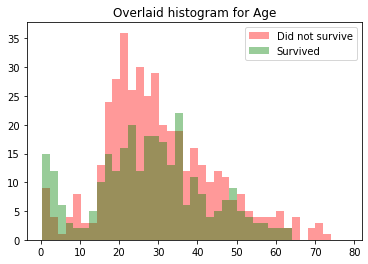

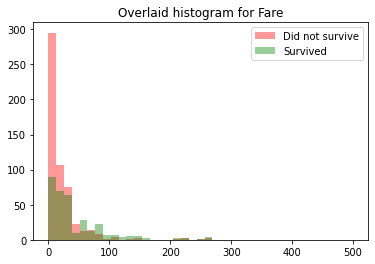

In [15]:
for i in ['Age', 'Fare']:

  died= list(df[df['Survived']==0][i].dropna())
  survived= list(df[df['Survived']==1][i].dropna())
  xmin=min(min(died), min(survived))
  xmax=max(max(died),max(survived))
  width=(xmax-xmin)/40
  sns.distplot(died, color='r',kde=False, bins=np.arange(xmin, xmax, width))
  sns.distplot(survived, color='g',kde=False, bins=np.arange(xmin, xmax, width))
  plt.legend(['Did not survive','Survived'])
  plt.title('Overlaid histogram for {}'.format(i))
  plt.show()

**General categorical plots for ordinal features**

In [16]:
df['Family_cnt']=df['SibSp']+ df['Parch']

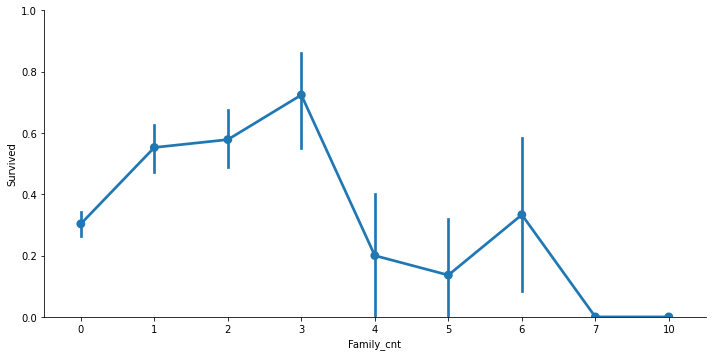

In [17]:
for col in ['Family_cnt']:
  sns.catplot(x=col, y='Survived', data=df, kind='point', aspect=2)
  plt.ylim(0,1)

##Anytime we can condense the amount of features down, we should, it just gives the model less things to look through

##**Merge Feature**

##**Exploring Categorical Features**

In [18]:
##check if there are any missing values
titanic=pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# check if there are any missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
categorical_features=['Survived','Name','Sex','Ticket','Cabin','Embarked']
titanic=titanic[categorical_features]

In [21]:
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S


In [22]:
titanic.isnull().sum()

Survived      0
Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [23]:
##Explore the number of unique values for each feature

In [24]:
for col in titanic.columns:
  print('{}: {} unique values'.format(col,titanic[col].nunique()))

Survived: 2 unique values
Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values


look at the correlation of survived with the other features

In [25]:
##check survival rate by gender
titanic.groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


check survival rate by embarked


In [26]:
titanic.groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


we start looking at missing values now

In [27]:
# is cabin missing at random?

titanic.groupby(titanic['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


In [28]:
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S


In [29]:
## Look at the unique values for the ticket feature
##Look a tthe value counts
titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [30]:
# Infer whether there might be a signal for surviving or not from the title of the name
#Since that might show the status of a person and a person of a higher status might have a higher chance of survival
titanic['Title']=titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [31]:
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Title
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,Mr


In [32]:
##Now we will look at the survival rate by title and sex since we both know that title
##and sex are going to be correlated evidently, also we are going to count the number of survived and also
##find the mean of the people who survived
titanic.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

In [33]:
##Now we are going to plot our categorical features


#1. Create a cabin indicator
titanic['Title_Raw']= titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic['Title']=titanic['Title_Raw'].apply(lambda x: x if x in ['Master', 'Miss', 'Mr','Mrs'] else 'Other')
titanic['Cabin_ind']=np.where(titanic['Cabin'].isnull(),0,1)
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Title,Title_Raw,Cabin_ind
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr,Mr,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs,Mrs,1
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss,Miss,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs,Mrs,1
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,Mr,Mr,0


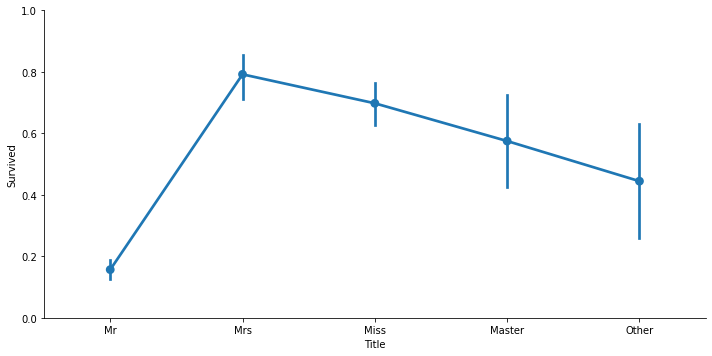

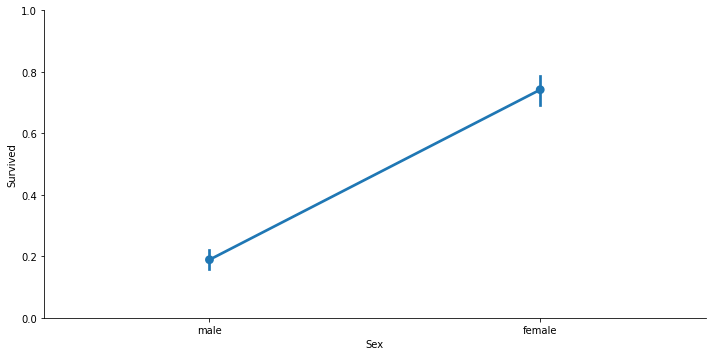

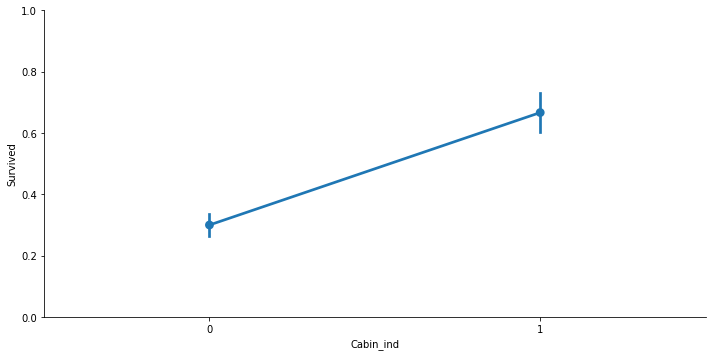

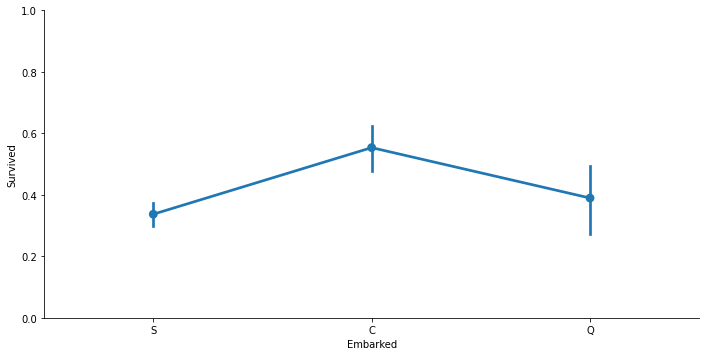

In [34]:
##Create Categorical Plots for features

for col in ['Title', 'Sex', 'Cabin_ind', 'Embarked']:
  sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2,)
  plt.ylim(0,1)


In [35]:
#Split embarked by whether the passengers had a cabin or not
titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


##**Cleaning**
The exploratory data analysis will inform our cleaning
There are threee primary methods to treat missing values
1. Impute to the median or mean of the feature
2. Model that feature to predict the missing values
3. Assign it some default value(Other or -999)

In [36]:
import pandas as pd
df1=pd.read_csv('train.csv')

In [37]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
##check if age appears to be missing at random
df1.groupby(df1['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [39]:
##We are going to treat the missing values of age to be missing at random
##we are going to fill the missing values for age as mean of age
##This way it satisfies the model by making sure that there is a value there
##And by replacing it with an average value , we are no biasing the model towards one outcome
##thus it will rely on other features to do their work in signalling the label



##Fill in the missing values for the age feature
df1['Age_clean']=df1['Age'].fillna(df1['Age'].mean())

In [40]:
df1.isnull().sum()
##Thus the age 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_clean        0
dtype: int64

##**Fill missing values for embarked**

In [41]:
df1['Embarked_clean']=df1['Embarked'].fillna('O')

In [42]:
df1.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_clean           0
Embarked_clean      0
dtype: int64

In [43]:
##Now we save our data with missing values cleaned up
df1.to_csv('titanic_no_missing.csv', index=False)

##**Creating and Cleaning Features: Cap and Floor Data to remove outliers**

We are going to remove the putliers in our data, this is to make sure that our model is fitting to the actual trends in our dat and not chasing after the outliers.

This technique is called capping (removing outliers at the high end) and flooring (removing outliers on the lower end)

In [44]:
titanic=pd.read_csv('titanic_no_missing.csv')

In [45]:
titanic.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_clean           0
Embarked_clean      0
dtype: int64

In [46]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [47]:
np.std(titanic)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


PassengerId    257.209383
Survived         0.486319
Pclass           0.835602
Age             14.516321
SibSp            1.102124
Parch            0.805605
Fare            49.665534
Age_clean       12.994717
dtype: float64

##Detect Outliers


In [48]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [49]:
def detect_outliers(feature):
  outliers=[]
  data=titanic[feature]
  mean=np.mean(data)
  std=np.std(data)

  for y in data:
  
    z_score=(y-mean)/std
    if np.abs(z_score)>3:

      outliers.append(y)
      print('\n Outlier caps for {}:'.format(feature))
      print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i> data.quantile(.95)])))
      print('  --3sd: {:.1f} / {} values exceed that'.format(mean+ 3*(std), len(outliers)))
      print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                             len([i for i in data
                                                                  if i> data.quantile(.99)])))

      

In [50]:
## Determine what upperbound should be for continuous features

for feat in ['Age_clean', 'SibSp', 'Parch', 'Fare']:
  detect_outliers(feat)


 Outlier caps for Age_clean:
  --95p: 54.0 / 42 values exceed that
  --3sd: 68.7 / 1 values exceed that
  --99p: 65.0 / 8 values exceed that

 Outlier caps for Age_clean:
  --95p: 54.0 / 42 values exceed that
  --3sd: 68.7 / 2 values exceed that
  --99p: 65.0 / 8 values exceed that

 Outlier caps for Age_clean:
  --95p: 54.0 / 42 values exceed that
  --3sd: 68.7 / 3 values exceed that
  --99p: 65.0 / 8 values exceed that

 Outlier caps for Age_clean:
  --95p: 54.0 / 42 values exceed that
  --3sd: 68.7 / 4 values exceed that
  --99p: 65.0 / 8 values exceed that

 Outlier caps for Age_clean:
  --95p: 54.0 / 42 values exceed that
  --3sd: 68.7 / 5 values exceed that
  --99p: 65.0 / 8 values exceed that

 Outlier caps for Age_clean:
  --95p: 54.0 / 42 values exceed that
  --3sd: 68.7 / 6 values exceed that
  --99p: 65.0 / 8 values exceed that

 Outlier caps for Age_clean:
  --95p: 54.0 / 42 values exceed that
  --3sd: 68.7 / 7 values exceed that
  --99p: 65.0 / 8 values exceed that

 Outl

In [51]:
## Cap Features
titanic['Age_clean'].clip(upper=titanic['Age_clean'].quantile(.99), inplace=True)
titanic['Fare_clean']=titanic['Fare'].clip(upper=titanic['Fare'].quantile(.99))

In [52]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean,Fare_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.640195,31.224767
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,12.820616,42.524125
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,65.000000,249.006220


In [53]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean,Fare_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.640195,31.224767
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,12.820616,42.524125
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,65.000000,249.006220


In [54]:
##Write out the capped data
titanic.to_csv('titanic_capped.csv', index=False)


In [55]:
jf=pd.read_csv('titanic_capped.csv')

In [56]:
jf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean,Fare_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.640195,31.224767
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,12.820616,42.524125
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,65.000000,249.006220


##**Creating and Cleaning Features: Transforming Skewed Values**

Skewed data can be problematic, we discussed previously that with skewed data, the model will go chasing after the long tail instead of focusing on where the bulk of the data is. 
Removing outliers can definitely shorten that tail by removing extreme values but transforming that data can altogether change the shape of the distribution altogether making it better for the model to understand

In [57]:
## import all the necessary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
titanic=pd.read_csv('titanic_capped.csv')

In [58]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


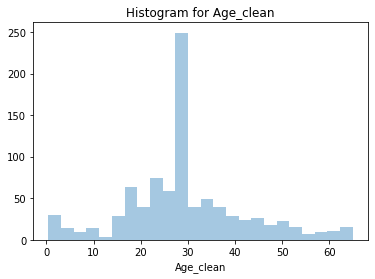

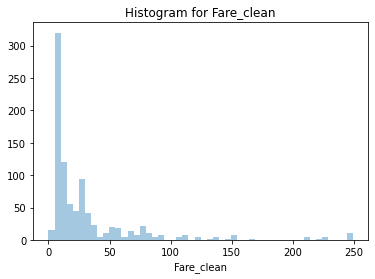

In [59]:
for feature in ['Age_clean', 'Fare_clean']:
  sns.distplot(titanic[feature], kde=False)
  plt.title('Histogram for {}'.format(feature))
  plt.show()

##Box-Cox Power Transofrmation

Determine what range of exponents to test
Apply each transformation to each value of your chosen feature
chose some criteria to determine which of the transofrmations yield the best result

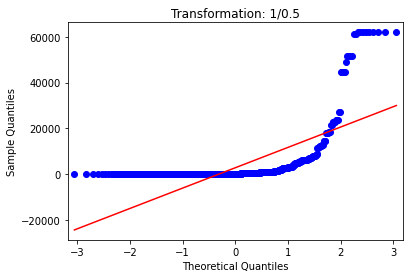

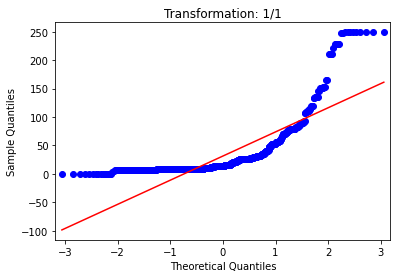

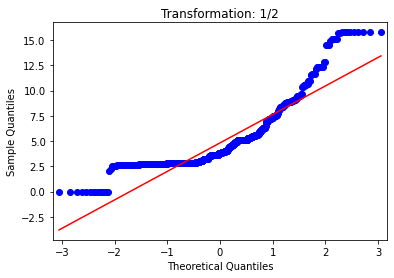

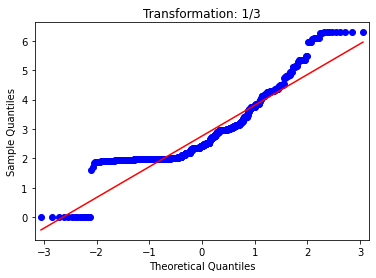

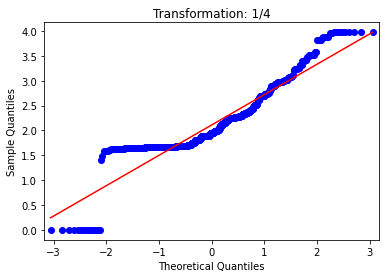

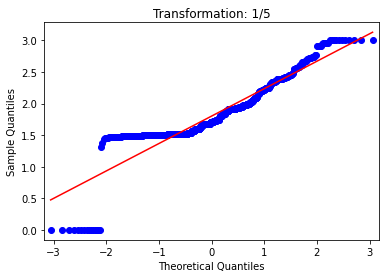

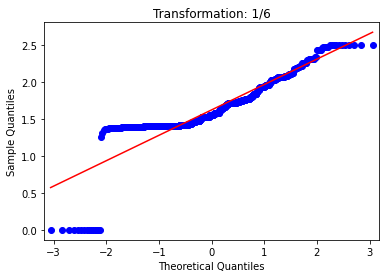

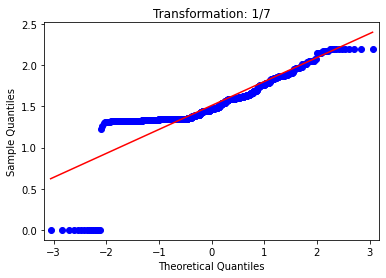

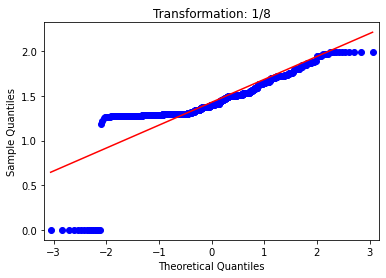

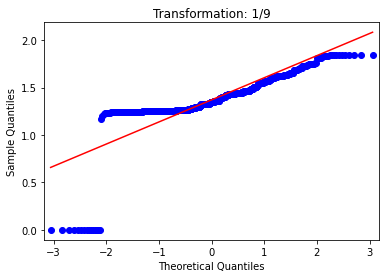

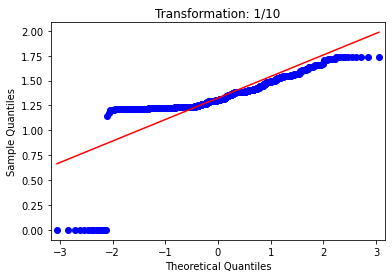

In [60]:
#Generate qq plots
for i in [0.5,1,2,3,4,5,6,7,8,9,10]:
  data_t=titanic['Fare_clean']**(1/i)
  qqplot(data_t, line='s')
  plt.title("Transformation: 1/{}".format(str(i)))

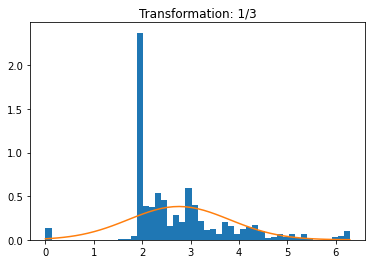

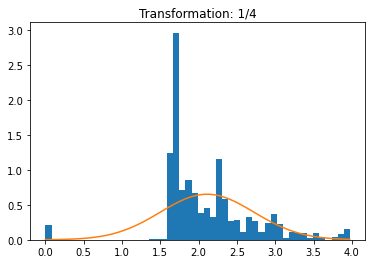

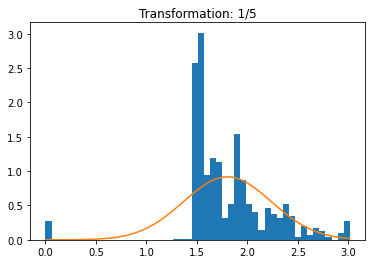

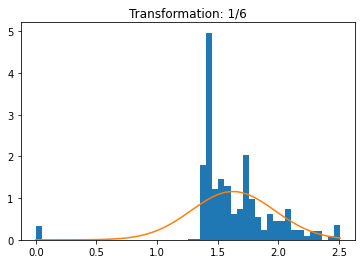

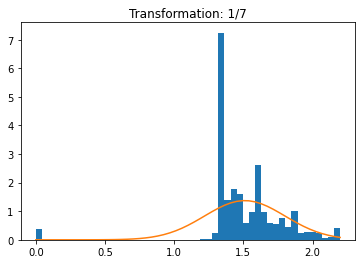

In [61]:
##Box-Cox Transformations
for i in [3,4,5,6,7]:
  data_t=titanic['Fare_clean']**(1/i)
  n,bins,patches=plt.hist(data_t,50,density=True)
  mu=np.mean(data_t)
  sigma=np.std(data_t)
  plt.plot(bins,scipy.stats.norm.pdf(bins, mu, sigma))
  plt.title("Transformation: 1/{}".format(str(i)))
  plt.show()

In [62]:
##Create new transformed feature
titanic['Fare_clean_tr']=titanic['Fare_clean'].apply(lambda x: x**(1/5))


In [63]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606


In [64]:
titanic.to_csv('titanic_transformed.csv')

In [65]:
gh=pd.read_csv('titanic_transformed.csv')

In [66]:
gh.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606


##**Create New Features From Text**

In [67]:
import pandas as pd
titanic=pd.read_csv('titanic_transformed.csv')

In [68]:
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606


In [69]:
titanic['Title']=titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [70]:
titanic.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs


In [71]:
##look at survival rate by title
titanic.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

In [72]:
##Create new csv with updated data
titanic.to_csv('titanic_title.csv', index=False)

In [73]:
titanic=pd.read_csv('titanic_title.csv')

In [74]:
titanic.isnull().sum()

Unnamed: 0          0
PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_clean           0
Embarked_clean      0
Fare_clean          0
Fare_clean_tr       0
Title               0
dtype: int64

In [75]:
##We still have about 75 percent of data missing for cabin in titanic

In [76]:
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

##This gives us a valuable insight that when the cabin was missing for a passenger, their survival rate was 30%
##Whilw when the cabin was given for a passenger their survival rate was about 66
##This is a strong featurer for the model to learn

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [77]:
#We will do this by creating an indicator variable for cabin indicating
## Whether there was a 

titanic['Cabin_ind']=np.where(titanic['Cabin'].isnull(),0,1)


In [78]:
titanic.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1


In [79]:
titanic.to_csv('titanic_cabin_ind.csv', index=False)

##**Combining Existing Features into a New Feature**

In [80]:
titanic=pd.read_csv('titanic_cabin_ind.csv')

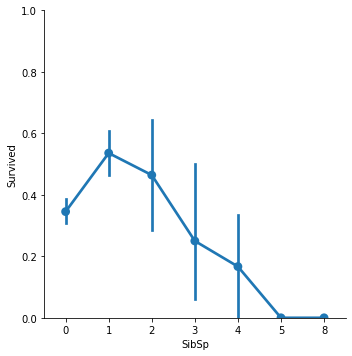

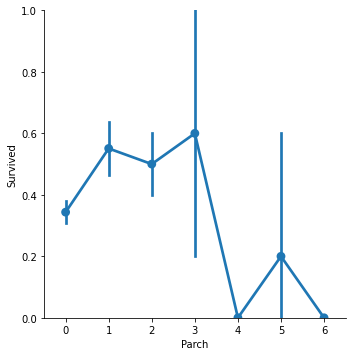

In [81]:
for col in ['SibSp','Parch']:
  sns.catplot(x=col, y='Survived', data=titanic, kind='point', asprct=2,)
  plt.ylim(0,1)


In [82]:
titanic['Family_cnt']=titanic['SibSp']+titanic['Parch']

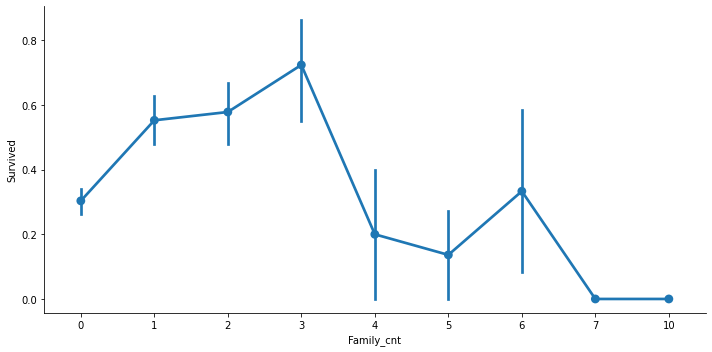

In [83]:
sns.catplot(x='Family_cnt', y='Survived', data=titanic, kind='point', aspect=2,)

In [84]:
titanic.to_csv('titanic_family_cnt.csv', index=False)

##**Converting Categorical Features to Numeric**

In [85]:
titanic=pd.read_csv('titanic_family_cnt.csv')

In [86]:
from sklearn.preprocessing import LabelEncoder
#Convert Categorical Features into numeric features
for col in ['Sex','Cabin','Embarked','Embarked_clean','Title']:
  #instantiate the label encoder

  le=LabelEncoder()
  #astype=str makes sure python treats all the values as type string even though NaN in Cabin python may
  #Consider that as type of an integer
  titanic[col]=le.fit_transform(titanic[col].astype(str))


In [87]:
titanic.head(3)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,22.0,3,7.2500,1.486167,11,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,38.0,0,71.2833,2.347457,12,1,1
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2,26.0,3,7.9250,1.512864,8,0,0


In [88]:
titanic.to_csv('titanic_numeric.csv', index=False)

##**Separate Data into Train, Test and Validation Data**

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [90]:
titanic=pd.read_csv('titanic_numeric.csv')

In [91]:
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,22.0,3,7.2500,1.486167,11,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,38.0,0,71.2833,2.347457,12,1,1
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2,26.0,3,7.9250,1.512864,8,0,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,35.0,3,53.1000,2.213191,12,1,1
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2,35.0,3,8.0500,1.517606,11,0,0


In [92]:
#Split any unnecessary features and divide into train test split data
features=titanic.drop(['PassengerId','Ticket','Name','Survived'], axis=1)
labels=titanic['Survived']

In [93]:
X_train, X_test, y_train, y_test=train_test_split(features,labels, test_size=0.4, random_state=42)
#Second Pass
X_val, X_test, y_val, y_test=train_test_split(X_test,y_test, test_size=0.5, random_state=42)


In [94]:
X_train.head()

,Unnamed: 0,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
570,570,2,1,62.0,0,0,10.5000,147,2,62.0,3,10.5000,1.600434,11,0,0
787,787,3,1,8.0,4,1,29.1250,147,1,8.0,2,29.1250,1.962697,7,0,5
74,74,3,1,32.0,0,0,56.4958,147,2,32.0,3,56.4958,2.240801,11,0,0
113,113,3,0,20.0,1,0,9.8250,147,2,20.0,3,9.8250,1.579307,8,0,1
635,635,2,0,28.0,0,0,13.0000,147,2,28.0,3,13.0000,1.670278,8,0,0


In [95]:
for dataset in [y_train, y_val,y_test]:
  print(round(len(dataset)/len(labels),2))


0.6
0.2
0.2


##**Write out all data**

In [96]:
X_train.to_csv('train_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)

##**Reading Data**

In [97]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

##**Standardizing Features**

In [98]:
titanic_train=pd.read_csv('train_features.csv')
titanic_val=pd.read_csv('val_features.csv')
titanic_test=pd.read_csv('test_features.csv')


In [99]:
titanic_train.head()

,Unnamed: 0,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,570,2,1,62.0,0,0,10.5000,147,2,62.0,3,10.5000,1.600434,11,0,0
1,787,3,1,8.0,4,1,29.1250,147,1,8.0,2,29.1250,1.962697,7,0,5
2,74,3,1,32.0,0,0,56.4958,147,2,32.0,3,56.4958,2.240801,11,0,0
3,113,3,0,20.0,1,0,9.8250,147,2,20.0,3,9.8250,1.579307,8,0,1
4,635,2,0,28.0,0,0,13.0000,147,2,28.0,3,13.0000,1.670278,8,0,0


In [100]:
#Fit the standard scaler to the data
scaler=StandardScaler()
scaler.fit(titanic_train)

StandardScaler()

In [101]:
#Scaling the training test and validation data
##Just a reminder, what its doing here is that its taking the mean and tsandard deviation which it 
##learned from the training data from the code block below and its using that to transform each value of feature
##for that value in the train, validation and testing data.
features=titanic_train.columns
titanic_train[features]=scaler.transform(titanic_train[features])
titanic_val[features]=scaler.transform(titanic_val[features])
titanic_test[features]=scaler.transform(titanic_test[features])


In [102]:
##Now we have all the data on the same scale which isnt necessary to do for random forsts because it can do
##without standardizing the data set

titanic_val.head()

,Unnamed: 0,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,1.536471,-1.620987,-1.356623,NaN,0.325139,-0.468427,1.047786,-1.239700,-2.010857,0.031883,-2.094132,1.359813,1.487382,0.983811,1.837675,0.023220
1,-0.463116,-1.620987,0.737125,1.119279,-0.464063,-0.468427,-0.078274,-2.070731,0.573494,1.273851,0.545364,-0.061652,0.354629,0.430223,1.837675,-0.540385
2,-0.737191,0.803682,0.737125,NaN,-0.464063,-0.468427,-0.463821,0.450064,-0.718682,0.031883,-0.334468,-0.548341,-0.659694,0.430223,-0.544166,-0.540385
3,-0.521020,-0.408652,-1.356623,-0.364751,0.325139,-0.468427,-0.124726,0.450064,0.573494,-0.416075,0.545364,-0.120289,0.274143,0.983811,-0.544166,0.023220
4,-0.613664,-0.408652,0.737125,0.463545,-0.464063,-0.468427,-0.368596,-1.128895,-2.010857,0.527140,-2.094132,-0.428134,-0.295392,0.430223,1.837675,-0.540385


##**The 3 Final Datasets**

In [103]:
# Define the list of features to be used for all data sets

raw_original_features=['Pclass','Sex','Age_clean','SibSp','Parch','Fare','Cabin','Embarked']

cleaned_original_features=['Pclass','Sex','Age_clean','SibSp','Parch','Fare_clean','Cabin',
                           'Embarked_clean']

all_features=['Pclass','Sex','Age_clean','SibSp','Parch','Fare_clean','Fare_clean_tr',
              'Cabin','Cabin_ind','Embarked_clean','Title','Family_cnt']

reduced_features=['Pclass','Sex','Age_clean','Family_cnt','Fare_clean_tr','Cabin_ind','Title']

In [104]:
##Write out final data for each datasets
titanic_train[raw_original_features].to_csv('train_features_raw.csv', index=False)
titanic_test[raw_original_features].to_csv('test_features_raw.csv',index=False)
titanic_val[raw_original_features].to_csv('val_features_raw.csv',index=False)

titanic_train[cleaned_original_features].to_csv('train_features_cleaned.csv',index=False)
titanic_test[cleaned_original_features].to_csv('test_features_cleaned.csv',index=False)
titanic_val[cleaned_original_features].to_csv('val_features_cleaned.csv',index=False)

titanic_train[all_features].to_csv('train_features_all.csv',index=False)
titanic_test[all_features].to_csv('test_features_all.csv',index=False)
titanic_val[all_features].to_csv('val_features_all.csv',index=False)

titanic_train[reduced_features].to_csv('train_features_reduced.csv',index=False)
titanic_test[reduced_features].to_csv('test_features_reduced.csv',index=False)
titanic_val[reduced_features].to_csv('val_features_reduced.csv',index=False)

In [105]:
##Move labels to proper directory
titanic_train_labels=pd.read_csv('train_labels.csv')
titanic_test_labels=pd.read_csv('test_labels.csv')
titanic_val_labels=pd.read_csv('val_labels.csv')

In [106]:
titanic_train_labels.head(5)

,Survived
0,1
1,0
2,1
3,0
4,1


##**Build Models to Compare Features: Raw Original Features**

##**Read in Our Data**

In [107]:
import joblib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [108]:
train_features=pd.read_csv('train_features_raw.csv')
train_labels=pd.read_csv('train_labels.csv')

In [109]:
train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,-0.408652,0.737125,2.570771,-0.464063,-0.468427,-0.412724,0.450064,0.573494
1,0.803682,0.737125,-1.673694,2.692745,0.794906,-0.066661,0.450064,-0.718682
2,0.803682,0.737125,0.212735,-0.464063,-0.468427,0.441904,0.450064,0.573494
3,0.803682,-1.356623,-0.730480,0.325139,-0.468427,-0.425266,0.450064,0.573494
4,-0.408652,-1.356623,-0.101670,-0.464063,-0.468427,-0.366273,0.450064,0.573494


In [110]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     534 non-null    float64
 1   Sex        534 non-null    float64
 2   Age_clean  534 non-null    float64
 3   SibSp      534 non-null    float64
 4   Parch      534 non-null    float64
 5   Fare       534 non-null    float64
 6   Cabin      534 non-null    float64
 7   Embarked   534 non-null    float64
dtypes: float64(8)
memory usage: 33.5 KB


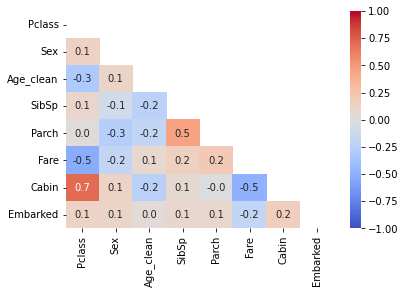

In [111]:
#Generate Correlation Matrix Heat Map
matrix=np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt ='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [112]:
def print_results(results):
  print('best params: {}\n'.format(results.best_params_))
  means=results.cv_results_['mean_test_score']
  std=results.cv_results_['std_test_score']

  for mean, std, params in zip(means, std, results.cv_results_['params']):
    print('{} (+/-{} for {}'.format(round(mean,3), round(std*2,3), params))

In [113]:
##Conduct search for best params while conducting cross validation

rf=RandomForestClassifier()
parameters={
    'n_estimators': [2**i for i in range (3,10)],
    'max_depth':[2,4,8,16,32, None]
}
cv=GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())
print_results(cv)

best params: {'max_depth': 8, 'n_estimators': 128}

0.779 (+/-0.121 for {'max_depth': 2, 'n_estimators': 8}
0.798 (+/-0.093 for {'max_depth': 2, 'n_estimators': 16}
0.796 (+/-0.108 for {'max_depth': 2, 'n_estimators': 32}
0.792 (+/-0.11 for {'max_depth': 2, 'n_estimators': 64}
0.798 (+/-0.095 for {'max_depth': 2, 'n_estimators': 128}
0.798 (+/-0.113 for {'max_depth': 2, 'n_estimators': 256}
0.788 (+/-0.102 for {'max_depth': 2, 'n_estimators': 512}
0.82 (+/-0.128 for {'max_depth': 4, 'n_estimators': 8}
0.815 (+/-0.101 for {'max_depth': 4, 'n_estimators': 16}
0.815 (+/-0.106 for {'max_depth': 4, 'n_estimators': 32}
0.82 (+/-0.106 for {'max_depth': 4, 'n_estimators': 64}
0.824 (+/-0.102 for {'max_depth': 4, 'n_estimators': 128}
0.815 (+/-0.12 for {'max_depth': 4, 'n_estimators': 256}
0.82 (+/-0.105 for {'max_depth': 4, 'n_estimators': 512}
0.835 (+/-0.036 for {'max_depth': 8, 'n_estimators': 8}
0.824 (+/-0.106 for {'max_depth': 8, 'n_estimators': 16}
0.839 (+/-0.065 for {'max_depth': 8, '

##**Feature Importance**

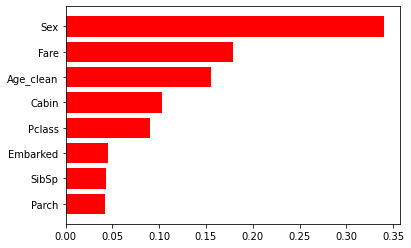

In [114]:
feat_imp=cv.best_estimator_.feature_importances_
indices=np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

##**Write Out Pickeled Model**

In [115]:
joblib.dump(cv.best_estimator_,'mdl_raw_original_features.pkl')

['mdl_raw_original_features.pkl']

##**Model with Cleaned Features**

In [116]:
train_features=pd.read_csv('train_features_cleaned.csv')
train_labels=pd.read_csv('train_labels.csv')

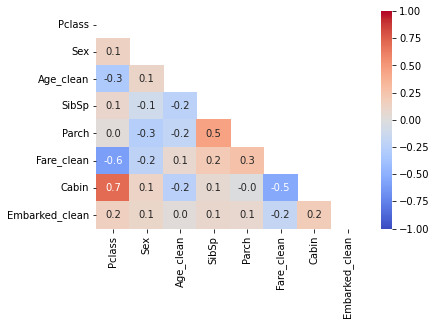

In [117]:
matrix=np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt ='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [118]:
rf=RandomForestClassifier()
parameters={
    'n_estimators': [2**i for i in range (3,10)],
    'max_depth':[2,4,8,16,32, None]
}
cv=GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())
print_results(cv)

best params: {'max_depth': 8, 'n_estimators': 512}

0.796 (+/-0.09 for {'max_depth': 2, 'n_estimators': 8}
0.785 (+/-0.058 for {'max_depth': 2, 'n_estimators': 16}
0.777 (+/-0.096 for {'max_depth': 2, 'n_estimators': 32}
0.8 (+/-0.123 for {'max_depth': 2, 'n_estimators': 64}
0.79 (+/-0.107 for {'max_depth': 2, 'n_estimators': 128}
0.796 (+/-0.117 for {'max_depth': 2, 'n_estimators': 256}
0.79 (+/-0.107 for {'max_depth': 2, 'n_estimators': 512}
0.8 (+/-0.086 for {'max_depth': 4, 'n_estimators': 8}
0.807 (+/-0.075 for {'max_depth': 4, 'n_estimators': 16}
0.824 (+/-0.111 for {'max_depth': 4, 'n_estimators': 32}
0.828 (+/-0.075 for {'max_depth': 4, 'n_estimators': 64}
0.811 (+/-0.121 for {'max_depth': 4, 'n_estimators': 128}
0.824 (+/-0.116 for {'max_depth': 4, 'n_estimators': 256}
0.815 (+/-0.116 for {'max_depth': 4, 'n_estimators': 512}
0.826 (+/-0.047 for {'max_depth': 8, 'n_estimators': 8}
0.833 (+/-0.054 for {'max_depth': 8, 'n_estimators': 16}
0.835 (+/-0.06 for {'max_depth': 8, 'n_e

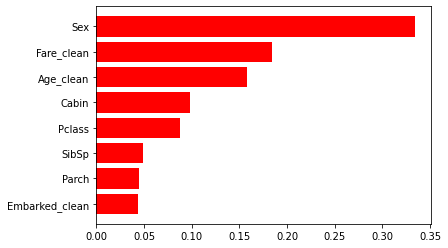

In [119]:
feat_imp=cv.best_estimator_.feature_importances_
indices=np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [120]:
joblib.dump(cv.best_estimator_,'mdl_cleaned_original_features.pkl')

['mdl_cleaned_original_features.pkl']

In [121]:
train_features=pd.read_csv('train_features_all.csv')
train_labels=pd.read_csv('train_labels.csv')

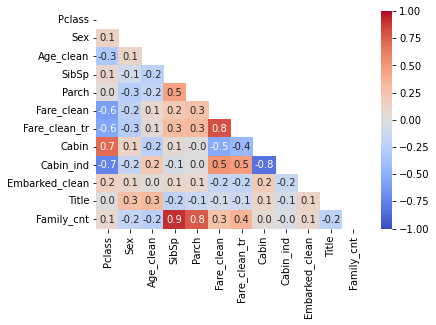

In [122]:
matrix=np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt ='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [123]:
rf=RandomForestClassifier()
parameters={
    'n_estimators': [2**i for i in range (3,10)],
    'max_depth':[2,4,8,16,32, None]
}
cv=GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())
print_results(cv)

best params: {'max_depth': 8, 'n_estimators': 256}

0.792 (+/-0.101 for {'max_depth': 2, 'n_estimators': 8}
0.792 (+/-0.11 for {'max_depth': 2, 'n_estimators': 16}
0.788 (+/-0.133 for {'max_depth': 2, 'n_estimators': 32}
0.792 (+/-0.121 for {'max_depth': 2, 'n_estimators': 64}
0.787 (+/-0.112 for {'max_depth': 2, 'n_estimators': 128}
0.781 (+/-0.126 for {'max_depth': 2, 'n_estimators': 256}
0.787 (+/-0.117 for {'max_depth': 2, 'n_estimators': 512}
0.824 (+/-0.072 for {'max_depth': 4, 'n_estimators': 8}
0.833 (+/-0.084 for {'max_depth': 4, 'n_estimators': 16}
0.826 (+/-0.084 for {'max_depth': 4, 'n_estimators': 32}
0.826 (+/-0.089 for {'max_depth': 4, 'n_estimators': 64}
0.82 (+/-0.094 for {'max_depth': 4, 'n_estimators': 128}
0.833 (+/-0.077 for {'max_depth': 4, 'n_estimators': 256}
0.822 (+/-0.084 for {'max_depth': 4, 'n_estimators': 512}
0.809 (+/-0.092 for {'max_depth': 8, 'n_estimators': 8}
0.822 (+/-0.044 for {'max_depth': 8, 'n_estimators': 16}
0.83 (+/-0.032 for {'max_depth': 8,

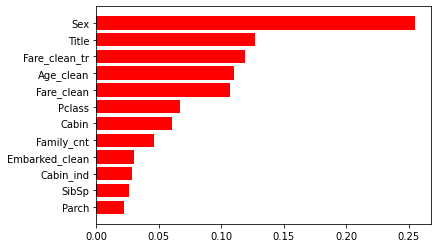

In [124]:
feat_imp=cv.best_estimator_.feature_importances_
indices=np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [125]:
joblib.dump(cv.best_estimator_,'mdl_trained_features_all.pkl')

['mdl_trained_features_all.pkl']

##**Model with Reduced Set of Features**

In [126]:
train_features=pd.read_csv('train_features_reduced.csv')
train_labels=pd.read_csv('train_labels.csv')

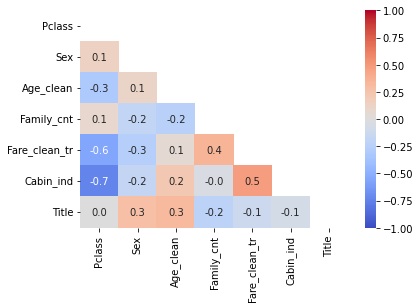

In [127]:
matrix=np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt ='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [128]:
rf=RandomForestClassifier()
parameters={
    'n_estimators': [2**i for i in range (3,10)],
    'max_depth':[2,4,8,16,32, None]
}
cv=GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())
print_results(cv)

best params: {'max_depth': 4, 'n_estimators': 64}

0.779 (+/-0.152 for {'max_depth': 2, 'n_estimators': 8}
0.781 (+/-0.111 for {'max_depth': 2, 'n_estimators': 16}
0.802 (+/-0.114 for {'max_depth': 2, 'n_estimators': 32}
0.802 (+/-0.123 for {'max_depth': 2, 'n_estimators': 64}
0.79 (+/-0.107 for {'max_depth': 2, 'n_estimators': 128}
0.783 (+/-0.129 for {'max_depth': 2, 'n_estimators': 256}
0.785 (+/-0.119 for {'max_depth': 2, 'n_estimators': 512}
0.813 (+/-0.128 for {'max_depth': 4, 'n_estimators': 8}
0.818 (+/-0.106 for {'max_depth': 4, 'n_estimators': 16}
0.82 (+/-0.101 for {'max_depth': 4, 'n_estimators': 32}
0.83 (+/-0.072 for {'max_depth': 4, 'n_estimators': 64}
0.817 (+/-0.104 for {'max_depth': 4, 'n_estimators': 128}
0.813 (+/-0.105 for {'max_depth': 4, 'n_estimators': 256}
0.817 (+/-0.097 for {'max_depth': 4, 'n_estimators': 512}
0.817 (+/-0.097 for {'max_depth': 8, 'n_estimators': 8}
0.817 (+/-0.061 for {'max_depth': 8, 'n_estimators': 16}
0.817 (+/-0.069 for {'max_depth': 8, 

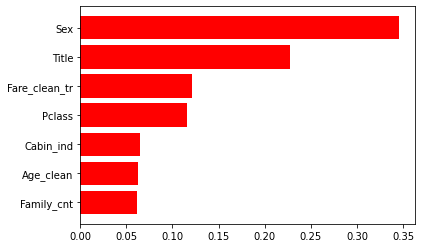

In [129]:
feat_imp=cv.best_estimator_.feature_importances_
indices=np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [130]:
joblib.dump(cv.best_estimator_,'mdl_trained_features_reduced.pkl')

['mdl_trained_features_reduced.pkl']

##**Compare and Evaluate All Models**

1. Evaluate all of our models on the validation set
2. Pick the best model
3. Evaluate the model on the holdout test set

##**Read in Our Data**

In [131]:
val_features_raw=pd.read_csv('val_features_raw.csv')
val_features_cleaned=pd.read_csv('val_features_cleaned.csv')
val_features_all=pd.read_csv('val_features_all.csv')
val_features_reduced=pd.read_csv('val_features_reduced.csv')
val_labels=pd.read_csv('val_labels.csv')

In [132]:
##Import Packages
import joblib
from sklearn.metrics import precision_score, recall_score, accuracy_score
from time import time
%matplotlib inline


##**Read in the Models**

In [136]:
models={}
for mdl in {'cleaned_original_features','raw_original_features','trained_features_all','trained_features_reduced'}:
  models[mdl]=joblib.load('mdl_{}.pkl'.format(mdl))

##**Evaluate Models on the Validation Dataset**

In [139]:
def evaluate_model(name,model, features, labels):
  start=time()
  pred=model.predict(features)
  end=time()
  accuracy=round(accuracy_score(labels,pred),3)
  precision=round(precision_score(labels,pred),3)
  recall=round(recall_score(labels,pred),3)
  print('{} -- \t Accuracy: {} / Precision: {} / Recall: {} / latency: {}ms'.format(name,accuracy,precision, recall,
                                                                                    round((end))))

In [140]:
##Evaluate all of our models on the validation set
evaluate_model('Raw Features', models['raw_original_features'], val_features_raw, val_labels)
evaluate_model('Cleaned Features', models['cleaned_original_features'], val_features_cleaned, val_labels)
evaluate_model('All Features', models['trained_features_all'], val_features_all, val_labels)
evaluate_model('Reduced Features', models['trained_features_reduced'], val_features_reduced, val_labels)


Raw Features -- 	 Accuracy: 0.803 / Precision: 0.778 / Recall: 0.646 / latency: 1668707047ms
Cleaned Features -- 	 Accuracy: 0.803 / Precision: 0.788 / Recall: 0.631 / latency: 1668707048ms
All Features -- 	 Accuracy: 0.826 / Precision: 0.793 / Recall: 0.708 / latency: 1668707048ms
Reduced Features -- 	 Accuracy: 0.82 / Precision: 0.8 / Recall: 0.677 / latency: 1668707048ms


##**Evaluate Best Model on Test Set**

In [144]:
test_features=pd.read_csv('test_features_all.csv')
test_labels=pd.read_csv('test_labels.csv')
evaluate_model('All Features', models['trained_features_all'], test_features, test_labels)

All Features -- 	 Accuracy: 0.804 / Precision: 0.825 / Recall: 0.684 / latency: 1668707778ms
